## To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

In [2]:

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore

warnings.filterwarnings('ignore')

In [25]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [26]:
edu_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

##  Data Cleaning Missing Values 

In [28]:
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [31]:
columnlist= [ 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']


for column in columnlist:
    edu_df.loc[:, column] = edu_df.loc[:, column].fillna(edu_df.loc[:, column].interpolate(method='linear'))


for column in columnlist:
    edu_df.loc[:, column] = edu_df.loc[:, column].fillna(edu_df.loc[:, column].mean())

#edu4_df.interpolate(method='linear')

In [32]:
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

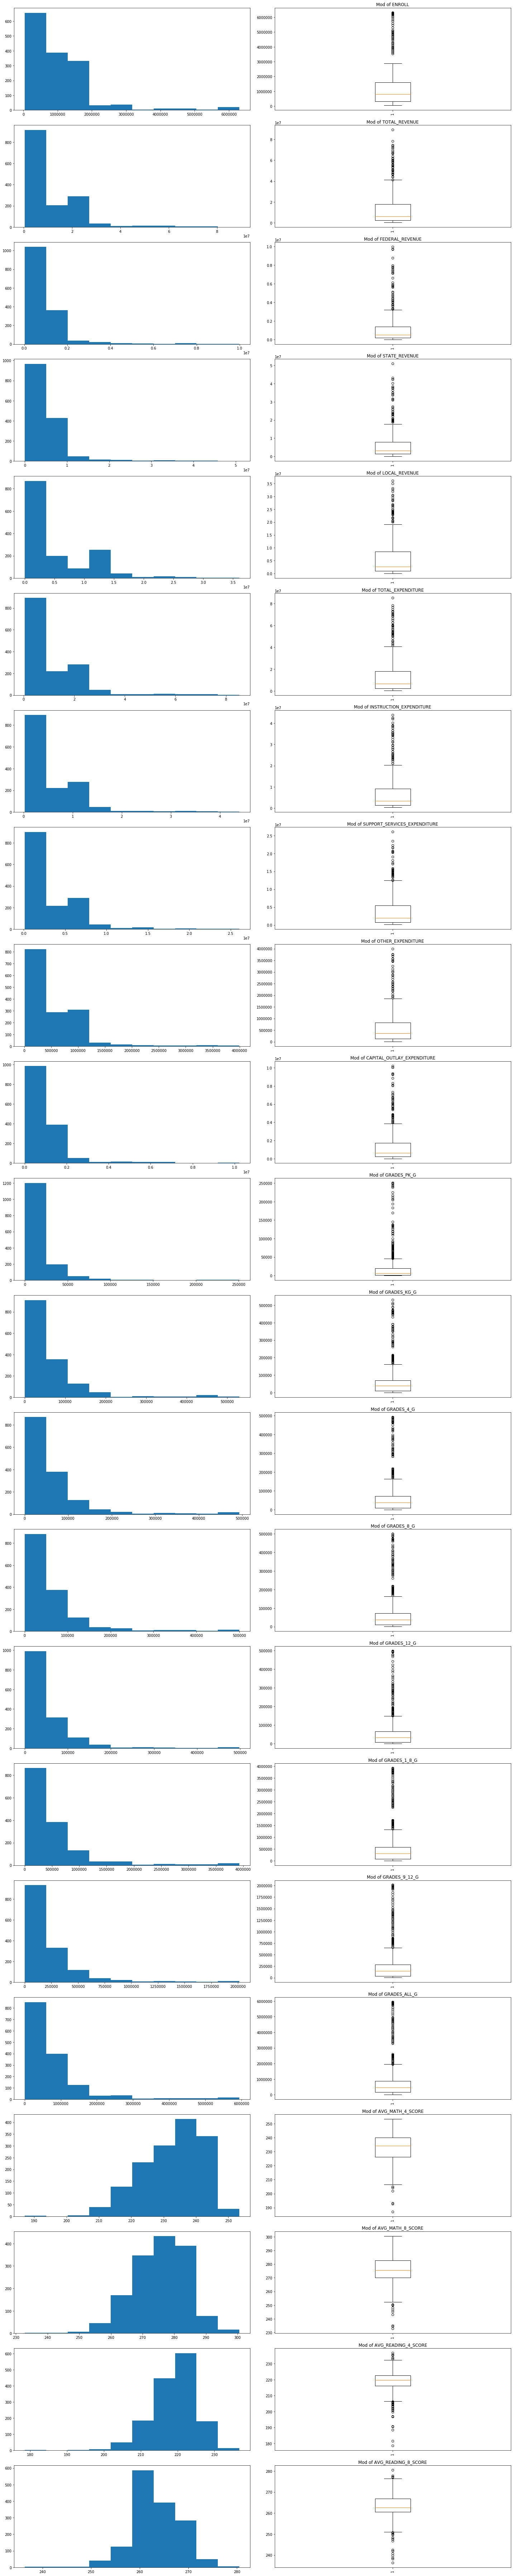

In [35]:
fig = plt.figure(figsize=(20,100))
for n, column in enumerate (columnlist):
    dataframe = edu_df[column]
    p=(n+1)*2
    plt.subplot(len(columnlist),2,p-1)
    plt.hist(edu_df[column])
    plt.title("Mod of {}".format(column))

    plt.subplot(len(columnlist),2,p)
    plt.boxplot(edu_df[column])
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

## 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?


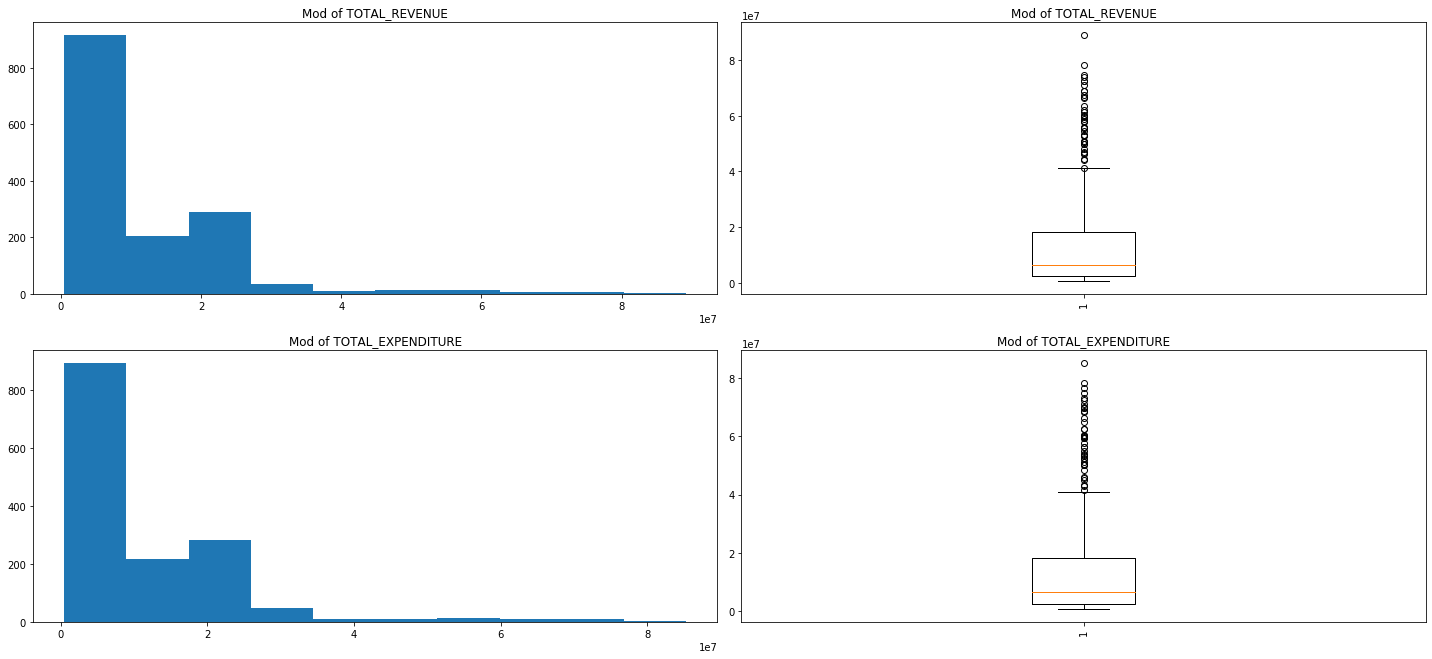

In [38]:
listone = ['TOTAL_REVENUE','TOTAL_EXPENDITURE']


fig = plt.figure(figsize=(20,100))
for n, column in enumerate (listone):
    dataframe = edu_df[column]
    p=(n+1)*2
    plt.subplot(len(columnlist),2,p-1)
    plt.hist(edu_df[column])
    plt.title("Mod of {}".format(column))

    plt.subplot(len(columnlist),2,p)
    plt.boxplot(edu_df[column])
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [43]:
from scipy.stats import zscore
z_scores = zscore(edu_df["TOTAL_REVENUE"])
for threshold in range(2,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 2
The indices of the outliers:
(array([ 264,  316,  367,  420,  472,  481,  524,  552,  576,  605,  616,
        628,  656,  668,  680,  708,  719,  731,  760,  771,  784,  813,
        824,  836,  865,  876,  891,  921,  932,  944,  973,  984,  997,
       1025, 1036, 1048, 1077, 1088, 1101, 1129, 1140, 1152, 1180, 1191,
       1203, 1231, 1242, 1254, 1282]),)
Number of outliers is: 49
The score threshold is: 3
The indices of the outliers:
(array([ 472,  481,  524,  576,  628,  680,  731,  784,  813,  836,  865,
        891,  921,  932,  944,  973,  984,  997, 1025, 1036, 1048, 1077,
       1088, 1101, 1129, 1140, 1152, 1180, 1191, 1203, 1231, 1242, 1254,
       1282]),)
Number of outliers is: 34
The score threshold is: 4
The indices of the outliers:
(array([ 576,  628,  680,  731,  784,  836,  891,  944,  997, 1048, 1101,
       1129, 1152, 1180, 1203, 1231, 1254, 1282]),)
Number of outliers is: 18


In [42]:
from scipy.stats import zscore
z_scores = zscore(edu_df["TOTAL_EXPENDITURE"])
for threshold in range(2,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 2
The indices of the outliers:
(array([ 316,  367,  420,  472,  481,  501,  524,  552,  564,  576,  605,
        616,  628,  656,  668,  680,  708,  719,  731,  760,  771,  784,
        813,  824,  836,  865,  876,  891,  921,  932,  944,  973,  984,
        997, 1025, 1036, 1048, 1077, 1088, 1101, 1129, 1140, 1152, 1180,
       1191, 1203, 1231, 1242, 1254, 1282]),)
Number of outliers is: 50
The score threshold is: 3
The indices of the outliers:
(array([ 472,  481,  524,  576,  628,  680,  731,  760,  784,  813,  836,
        865,  876,  891,  921,  932,  944,  973,  984,  997, 1025, 1036,
       1048, 1077, 1088, 1101, 1129, 1140, 1152, 1180, 1191, 1203, 1231,
       1242, 1254, 1282]),)
Number of outliers is: 36
The score threshold is: 4
The indices of the outliers:
(array([ 576,  628,  680,  731,  784,  836,  891,  944,  973,  997, 1048,
       1077, 1101, 1129, 1152, 1180, 1203, 1231, 1254, 1282]),)
Number of outliers is: 20


In [57]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(edu_df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25
print( '\n'"for TOTAL_REVENUE" "\n")
for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((edu_df["TOTAL_REVENUE"] > max_val) 
                      | (edu_df["TOTAL_REVENUE"] < min_val))[0]))
    ))

q75, q25 = np.percentile(edu_df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25
print('\n' "for TOTAL_EXPENDITURE" '\n')
for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((edu_df["TOTAL_EXPENDITURE"] > max_val) 
                      | (edu_df["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))


for TOTAL_REVENUE

The score threshold is: 1.0
Number of outliers is: 50
The score threshold is: 1.5
Number of outliers is: 40
The score threshold is: 2.0
Number of outliers is: 33
The score threshold is: 2.5
Number of outliers is: 21
The score threshold is: 3.0
Number of outliers is: 12
The score threshold is: 3.5
Number of outliers is: 6
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 1

for TOTAL_EXPENDITURE

The score threshold is: 1.0
Number of outliers is: 52
The score threshold is: 1.5
Number of outliers is: 42
The score threshold is: 2.0
Number of outliers is: 35
The score threshold is: 2.5
Number of outliers is: 23
The score threshold is: 3.0
Number of outliers is: 14
The score threshold is: 3.5
Number of outliers is: 6
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 0


Yes, I would say that these variables have quite a few outliers just from viewing the box plots and histograms quite a few outliers can be seen for Total_Revenue there are __ values that more than two standard deviations from the mean 
and with Total_Expenditure there are 50 values that are more than two standard deviations from the mean. locking at interquartile range there arnt any serios drop offs in values until we reach the thrid quartile that seems to hod true for both 




## 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.


In [63]:
edu2_df = edu_df
edu3_df = edu_df


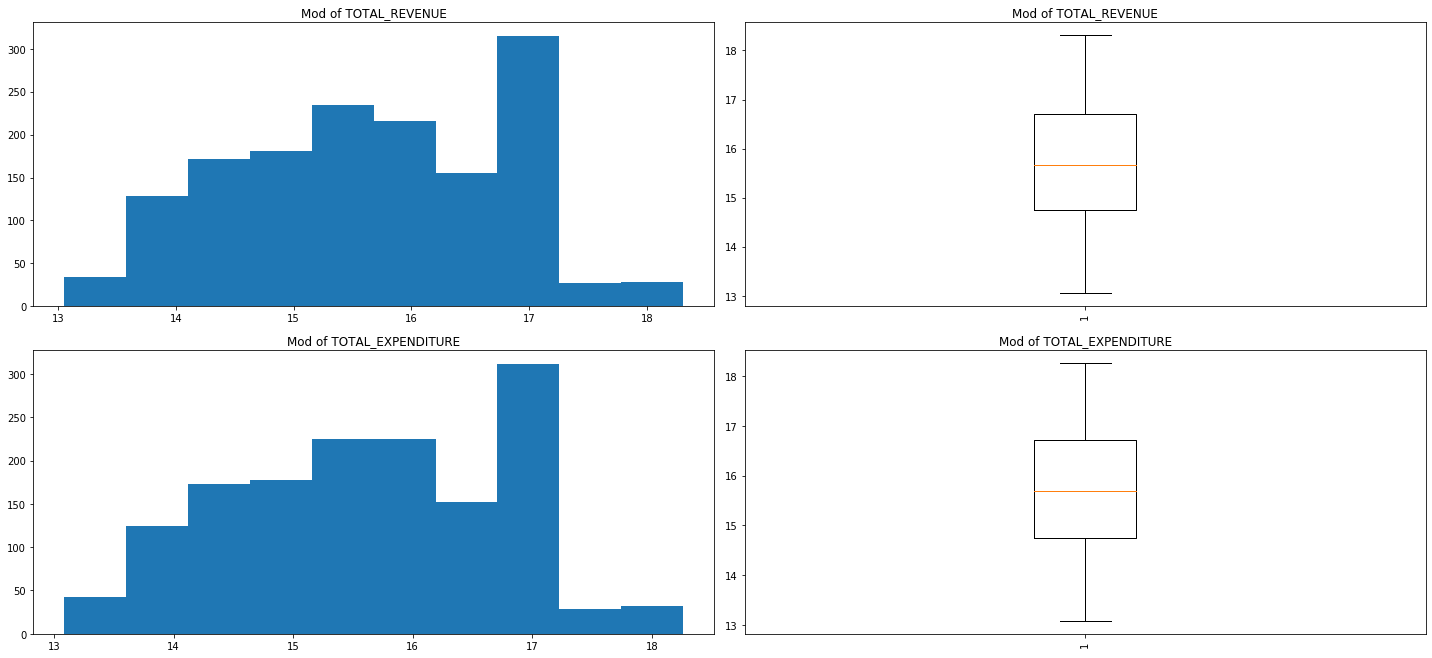

In [64]:
listone = ['TOTAL_REVENUE','TOTAL_EXPENDITURE']


fig = plt.figure(figsize=(20,100))
for n, column in enumerate (listone):
    dataframe = edu2_df[column]
    p=(n+1)*2
    plt.subplot(len(columnlist),2,p-1)
    plt.hist(np.log(edu2_df[column]))
    plt.title("Mod of {}".format(column))

    plt.subplot(len(columnlist),2,p)
    plt.boxplot(np.log(edu2_df[column]))
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [65]:

    
    
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(np.log(edu2_df["TOTAL_REVENUE"]), [75 ,25])
iqr = q75 - q25
print( '\n'"for TOTAL_REVENUE" "\n")
for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(edu2_df["TOTAL_REVENUE"]) > max_val) 
                      | (np.log(edu2_df["TOTAL_REVENUE"]) < min_val))[0]))
    ))
    
q75, q25 = np.percentile(np.log(edu2_df["TOTAL_EXPENDITURE"]), [75 ,25])
iqr = q75 - q25
print('\n' "for TOTAL_EXPENDITURE" '\n')
for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(edu2_df["TOTAL_EXPENDITURE"]) > max_val) 
                      | (np.log(edu2_df["TOTAL_EXPENDITURE"]) < min_val))[0]))
    ))


for TOTAL_REVENUE

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0

for TOTAL_EXPENDITURE

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


it appears that a log transformation removes all outliers sucessefully and normalizes the histogram for each of the populations however this might seem the least appropriate because we cannot alter the value of a dollar so we must stick to windsorization 



In [196]:

from scipy.stats.mstats import winsorize

winsorized_TOTAL_REVENUE = winsorize(edu3_df['TOTAL_REVENUE'], (0, .03))

winsorized_TOTAL_REVENUE

masked_array(data=[ 2678885.,  1049591.,  3258079., ..., 23766529.,
                   23766529., 23766529.],
             mask=False,
       fill_value=1e+20)

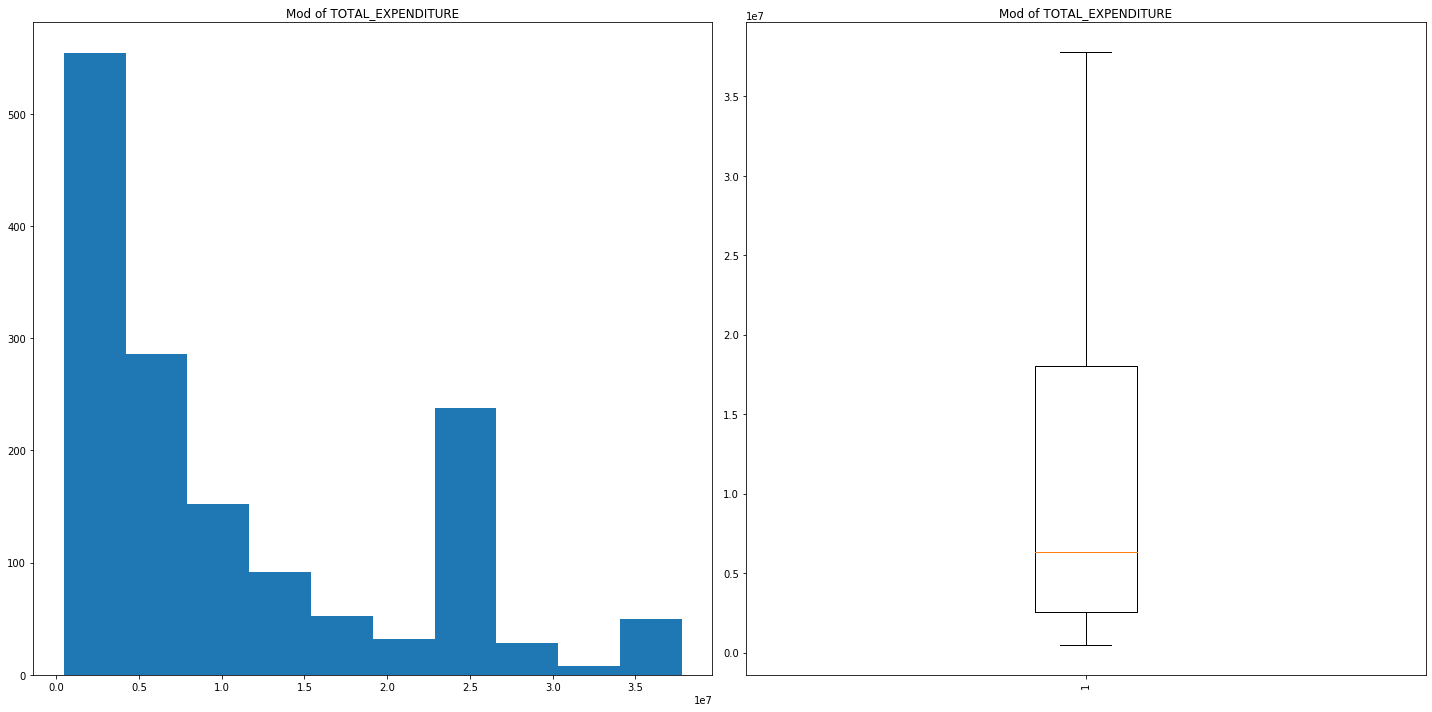

In [197]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(winsorized_TOTAL_REVENUE)
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(winsorized_TOTAL_REVENUE)
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [205]:
from scipy.stats.mstats import winsorize

winsorized_TOTAL_EXPENDITURE = winsorize(edu3_df['TOTAL_EXPENDITURE'], (0, .03))

winsorized_TOTAL_EXPENDITURE

masked_array(data=[ 2653798.,   972488.,  3401580., ..., 23352516.,
                   23352516., 23352516.],
             mask=False,
       fill_value=1e+20)

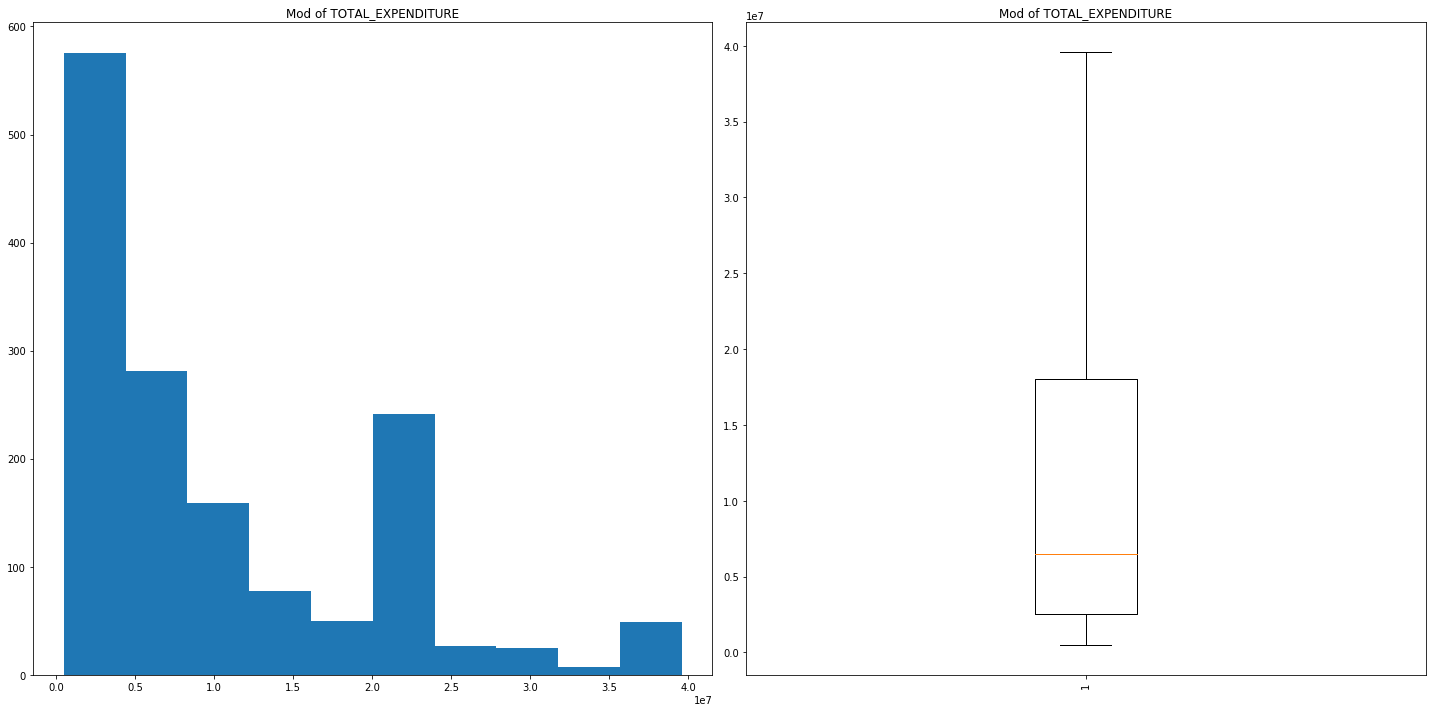

In [206]:
fig = plt.figure(figsize=(20,10))


plt.subplot(1,2,1)
plt.hist(winsorized_TOTAL_EXPENDITURE)
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(winsorized_TOTAL_EXPENDITURE)
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

## 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.


In [167]:
edu_df["Total_Deficit"] = edu_df["TOTAL_REVENUE"] - edu_df["TOTAL_EXPENDITURE"]
Total_Deficit = edu_df["Total_Deficit"]

In [61]:
edu_df["Total_Deficit"].describe()

count    1.492000e+03
mean    -3.209622e+04
std      5.607748e+05
min     -5.487742e+06
25%     -1.368148e+05
50%     -5.355000e+02
75%      1.876285e+05
max      3.897129e+06
Name: Total_Deficit, dtype: float64

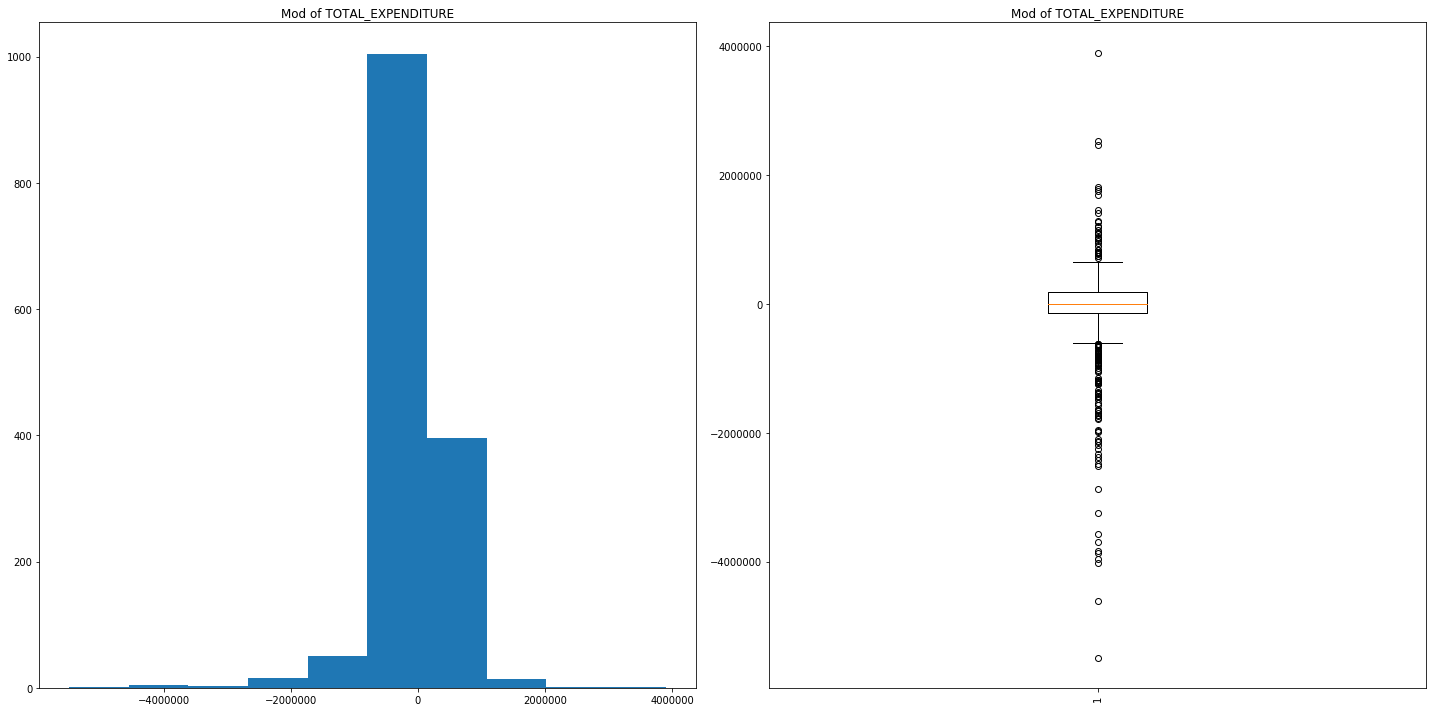

In [87]:
##
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(edu_df["Total_Deficit"])
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(edu_df["Total_Deficit"])
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [109]:
## transform data via windsorization 


from scipy.stats.mstats import winsorize


winsorized_views = winsorize(edu_df["Total_Deficit"], (.07, .05))

winsorized_views


masked_array(data=[  25087.,   77103., -143501., ...,  414013.,  414013.,
                    414013.],
             mask=False,
       fill_value=1e+20)

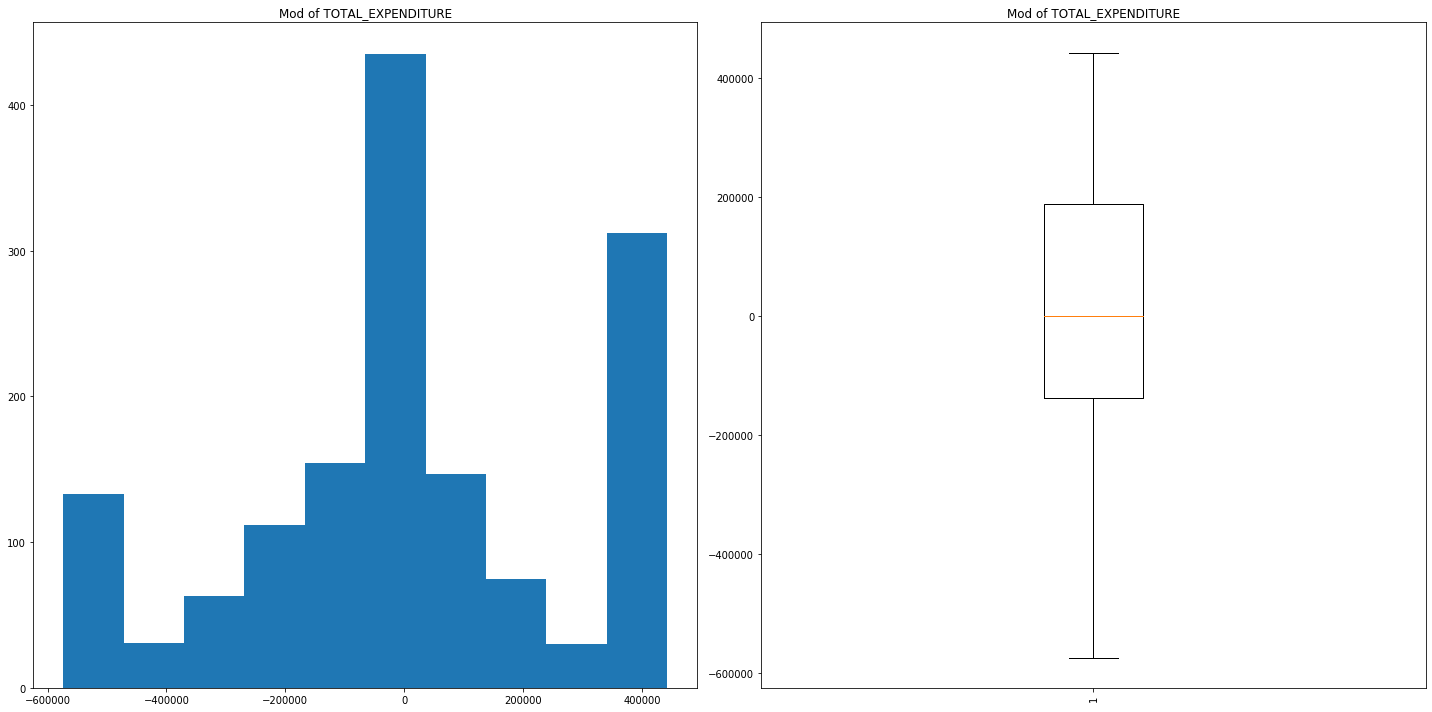

In [110]:
##
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(winsorized_views)
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(winsorized_views)
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

## 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.


In [120]:
edulog_df = edu2_df
edulog_df["Total_Deficit"] = np.log(edu2_df["TOTAL_REVENUE"])-np.log(edu2_df['TOTAL_EXPENDITURE'])
edulog_df["Total_Deficit"].describe()

count    1492.000000
mean       -0.002600
std         0.041662
min        -0.170369
25%        -0.024798
50%        -0.000261
75%         0.017574
max         0.332627
Name: Total_Deficit, dtype: float64

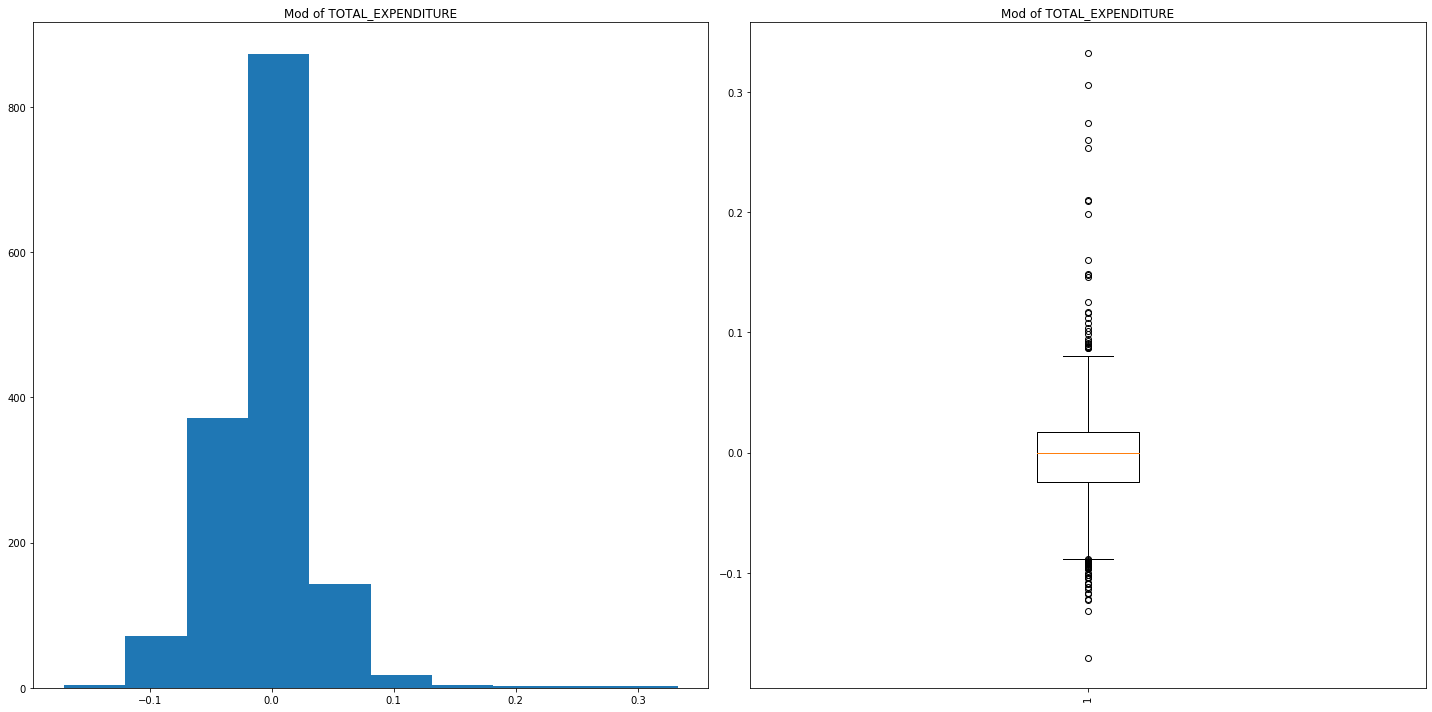

In [121]:
##
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(edulog_df["Total_Deficit"])
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(edulog_df["Total_Deficit"])
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [158]:
from scipy.stats.mstats import winsorize

edulog_df_winsorized = winsorize(edulog_df["Total_Deficit"], (.0235, .02))

edulog_df_winsorized


masked_array(data=[ 0.00940884,  0.07629811, -0.04310227, ...,
                    0.01757352,  0.01757352,  0.01757352],
             mask=False,
       fill_value=1e+20)

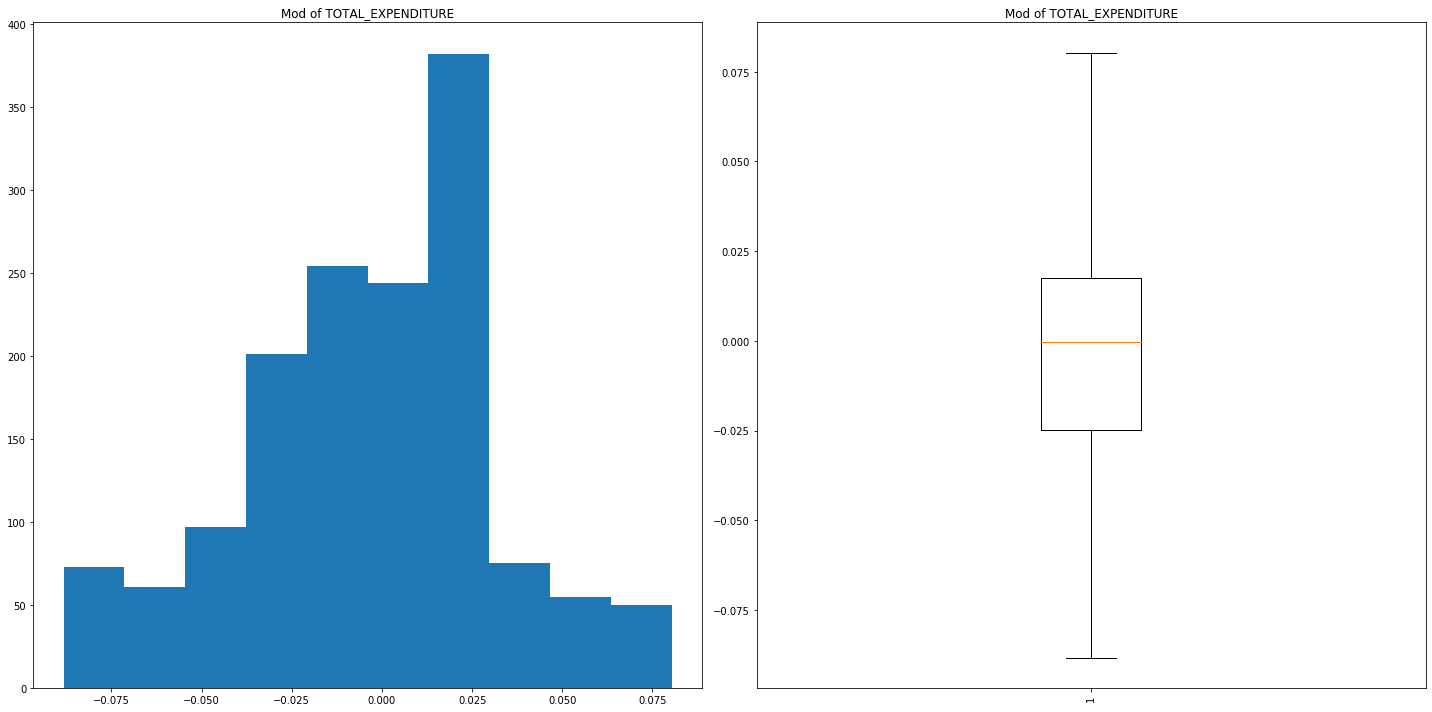

In [159]:
##
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(edulog_df_winsorized)
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(edulog_df_winsorized)
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [207]:
winsorbudgetdeficit = winsorized_TOTAL_REVENUE - winsorized_TOTAL_EXPENDITURE 

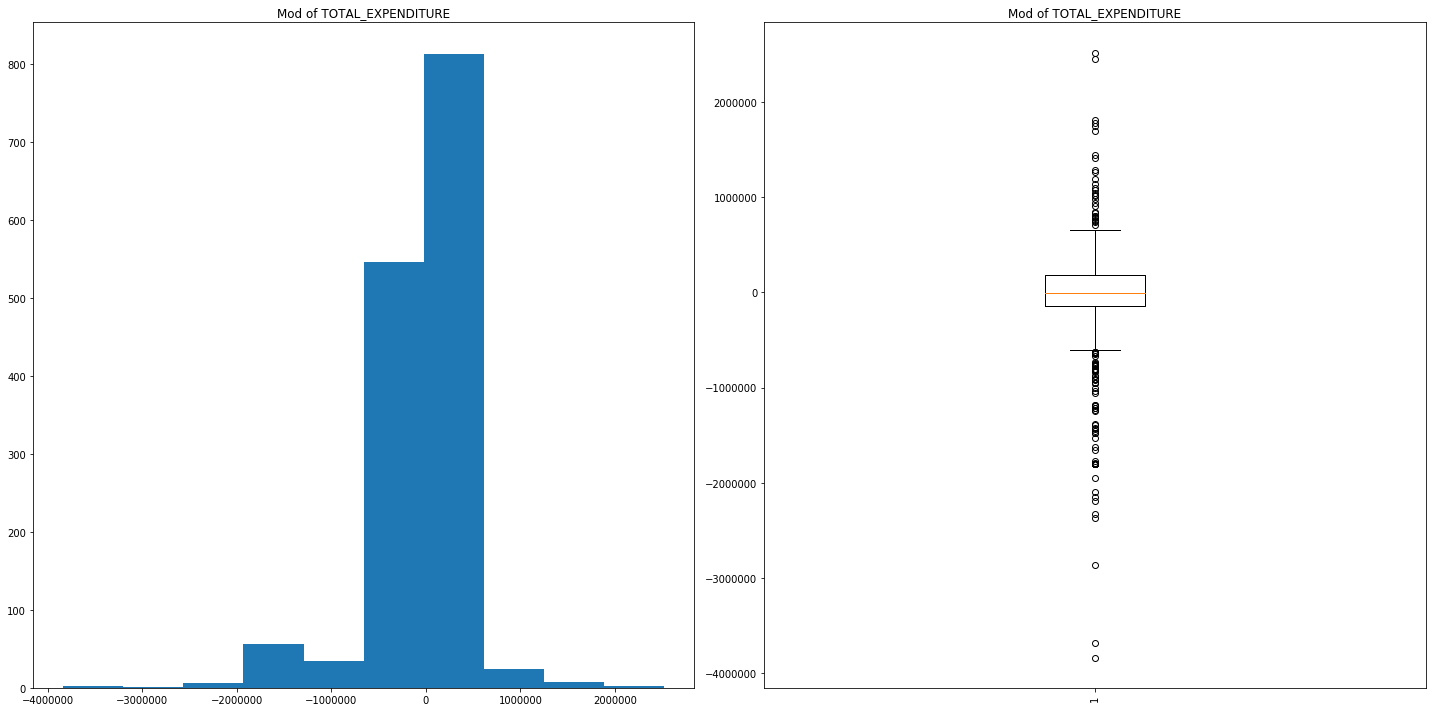

In [208]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(winsorbudgetdeficit)
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(winsorbudgetdeficit)
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [221]:
from scipy.stats.mstats import winsorize

double_winsorbudgetdeficit = winsorize(winsorbudgetdeficit, (.075, .021))

double_winsorbudgetdeficit


masked_array(data=[  25087.,   77103., -143501., ...,  414013.,  414013.,
                    414013.],
             mask=False,
       fill_value=1e+20)

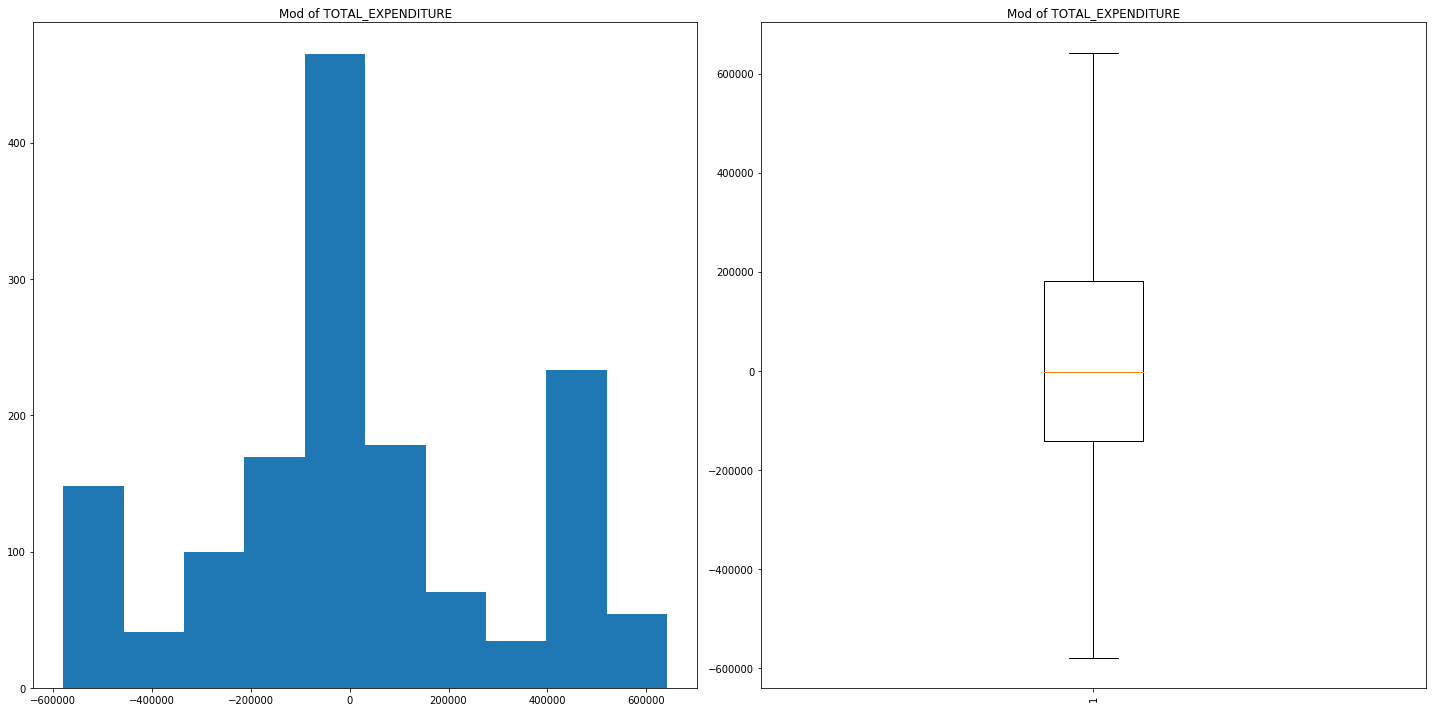

In [222]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(double_winsorbudgetdeficit)
plt.title("Mod of {}".format(column))

plt.subplot(1,2,2)
plt.boxplot(double_winsorbudgetdeficit)
plt.xticks(rotation='vertical')
plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

## 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?


In [164]:
edulog_df["Total_Deficit"].describe()

count    1492.000000
mean       -0.002600
std         0.041662
min        -0.170369
25%        -0.024798
50%        -0.000261
75%         0.017574
max         0.332627
Name: Total_Deficit, dtype: float64

In [165]:
edu_df["Total_Deficit"].describe()

count    1492.000000
mean       -0.002600
std         0.041662
min        -0.170369
25%        -0.024798
50%        -0.000261
75%         0.017574
max         0.332627
Name: Total_Deficit, dtype: float64

In [223]:
pd.DataFrame({"original_budget": Total_Deficit, "winsorized_budget1": winsorized_views,
              "log_winsorized_budget2": edulog_df_winsorized, "double winsorized budget" : double_winsorbudgetdeficit }).describe()

,original_budget,winsorized_budget1,log_winsorized_budget2,double winsorized budget
count,1.492000e+03,1492.000000,1492.000000,1492.000000
mean,-3.209622e+04,7504.393432,-0.003582,7978.013740
std,5.607748e+05,285571.016209,0.035269,300259.306491
min,-5.487742e+06,-573556.000000,-0.088281,-579443.000000
25%,-1.368148e+05,-136814.750000,-0.024798,-142821.750000
50%,-5.355000e+02,-535.500000,-0.000261,-1681.000000
75%,1.876285e+05,187628.500000,0.017574,180263.750000
max,3.897129e+06,442351.000000,0.080324,642491.000000


there is quite a large difference in 


## 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I think the secound would be best to use the variable from the third question this is because any altered variables could further alter results in the new variable this could be seen in the larger standard deviation of the doublwinsor budget deficit